# Titanic: Machine Learning from Disaster

In [89]:
# 본 프로젝트에 사용할 라이브러리입니다.
# 이후 셀을 실행하기 이전에 먼저 실행되어야 합니다.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

## 1. Data analysis
$\quad$Preprocessing, Machine Learning 알고리즘 적용에 앞서 먼저 주어진 데이터가 어떻게 구성되어 있는지 파악하는 것이 중요합니다. 본 Kaggle Project에서 제시한 데이터는 다음과 같은 정보를 포함하고 있습니다.
<br>
<img src="img/info.png">
<br>
<br>
$\quad$위와 같은 정보가 어떤 식으로 데이터에 저장되어 있는지, 그리고 데이터의 분포나 특징은 어떠한지 아래 설명과 코드를 통해 알아보도록 합시다.
<br>
<br>

In [70]:
#  데이터 읽어오기
train_data = pd.read_csv('data/train.csv');
test_data = pd.read_csv('data/test.csv');

$\quad$먼저, 데이터를 읽어오는 부분입니다. 데이터는 training을 위한 train.csv와 test를 위한 test.csv가 있습니다. 두 데이터를 읽어오기 위해 pandas 라이브러리의 read_csv 함수를 이용합니다. 불러온 데이터는 각각 train_data와 test_data로 지정됩니다. 
<br>

$\quad$읽어온 데이터에 위 정보들이 어떤 식으로 저장되어 있는지 확인해 볼 필요가 있습니다. 아래 코드를 실행시켜 train.csv와 test.csv의 일부를 확인해봅시다.

In [71]:
# train_data 중 처음 5개만 열기
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [97]:
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [95]:
    # train_data 중 마지막 5개만 열기
train_data.tail()



<bound method NDFrame.tail of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
5              6         0       3   
6              7         0       1   
7              8         0       3   
8              9         1       3   
9             10         1       2   
10            11         1       3   
11            12         1       1   
12            13         0       3   
13            14         0       3   
14            15         0       3   
15            16         1       2   
16            17         0       3   
17            18         1       2   
18            19         0       3   
19            20         1       3   
20            21         0       2   
21            22         1       2   
22            23         1       3   
23            24         1       1   
24            25    

$\quad$train_data는 각 행에 "PassangerId", "Survived", "Pclass", "Name", "Sex", "Age", "SibSp", "Parch", "Ticket", "Fare", "Cabin", "Embarked" 정보가 포함되어 있습니다. 여기서 "Survived"를 제외한 11가지 정보는 feature에 해당되고 "Survived"는 label에 해당됩니다.
<br>
<br>

In [72]:
# test_data 중 처음 5개만 열기
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [73]:
# test_data 중 마지막 5개만 열기
test_data.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


$\quad$test_data를 살펴보면 각 행에 "PassangerId", "Pclass", "Name", "Sex", "Age", "SibSp", "Parch", "Ticket", "Fare", "Cabin", "Embarked" 정보가 포함되어 있습니다. test_data는 모델을 검증하는 목적으로 사용하는 데이터이기 때문에 train_data와는 달리 label에 해당되는 "Survived" 정보가 없습니다.
<br>
<br>
$\quad$여기까지 살펴본 결과, "PassangerId"는 단순히 순서를 매기기 위해 붙여놓은 feature로 실제 생존여부 판별에는 필요 없는 데이터라는 것을 쉽게 알 수 있습니다. 그리고 "Pclass", "Age", "SipSp", "Parch", "Fare"는 숫자 정보로 별 다른 preprocessing을 거치지 않더라도 machine learning 알고리즘을 적용시킬수 있습니다. 하지만 그 외 "Name", "Sex", "Ticket", "Cabin", "Embarked"와 같이 문자 또는 문자 숫자 조합으로 이루어진 정보들은 적절한 vectorization이 필요합니다. 그 중 "Name", "Ticket", "Cabin"처럼 복잡한 정보는 vectorization 이전에 정보 제거 및 새로운 정보 추출 등 적절한 preprocessing이 필요하다는 것을 확인할 수 있습니다.
<br>
<br>
<br>


$\quad$위에서 주어진 데이터에 대해서 간단하게 파악해보았습니다. 지금부터는 주어진 데이터의 분포, 생존 여부("Survived")와의 연광성 등을 살펴보고 어떻게 preprocessing을 하면 좋을지 생각해보겠습니다.
<br>
<br>
$\quad$먼저 데이터 중 숫자로 이루어진 정보들의 분포를 확인해보겠습니다. 분포를 확인하기 위해 아래 코드를 실행시킵니다.

In [74]:
# train_data의 숫자 정보 분석
train_data.describe(percentiles=[0.25, 0.75])

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


$\quad$위 코드 결과 train_data에서 숫자 정보들의 count(개수), mean(평균), std(표준편차), min(최솟값), 정보를 오름차순으로 나열했을 때 상위 25%, 50%, 75%에 해당하는 값, max(최댓값)들이 출력됩니다.
<br>
<br>
$\quad$먼저 count정보를 확인해보겠습니다. 단순히 순서를 매긴 "PassengerId"의 갯수가 891인 것으로 보아 train_data에는 총 891명의 정보가 포함되어 있음을 확인할 수 있습니다. 그리고 "Age"의 count가 714인 것으로 보아 177명은 "Age"가 알려져 있지 않다는 것을 확인할 수 있습니다.
<br>
<br>
$\quad$다음으로 mean입니다. mean을 통해 탑승객의 탑승객의 생존율(38.4%), 티켓 등급(2.3등급), 평균 나이(29.7세), 평균 자매 수(0.52명), 평균 부모 자녀 수(0.38명), 평균 티켓 비용(32.2)을 확인할 수 있습니다.
<br>
<br>
$\quad$다음으로는 min, max, 25%, 50%, 75%에 해당하는 값입니다. 이 값을 통해 전반적인 분포를 파악할 수 있고 다양한 해석이 가능합니다. 예를 들면, "SibSp", "Parch"는 상위 75%까지도 1또는 0이므로 대부분의 탑승객이 가족 없이 혼자 탑승했음을 유추할 수 있습니다. 그리고 "Fare"의 75%까지는 31이었지만 max가 512인 것으로 보아 일부 고객들은 다른 고객들과는 차원이 다른 금액을 지불하고 탑승했음을 확인할 수 있습니다. 이 외에 상위 60% 또는 80% 등에 해당하는 값을 확인하고 싶으시면 위 코드의 percentile 내부의 값을 0.75, 0.8로 수정하면 됩니다.
<br>
<br>
$\quad$숫자로 이루어진 정보를 제외한 다른 정보들의 분포는 다음 코드를 실행시켜 확인할 수 있습니다.

In [75]:
# train_data의 숫자 외 정보 분석
train_data.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Smith, Miss. Marion Elsie",male,347082,B96 B98,S
freq,1,577,7,4,644


$\quad$위 코드 결과 숫자 외 정보인 "Name", "Sex" ,"Ticket" ,"Cabin", "Embarked"의 분포가 출력됩니다. 출력 결과는 count(개수), unique(서로 다른 정보 개수), top(상위 정보), freq(가장 많이 나온 정보 개수)들이 있습니다.
<br>
<br>
$\quad$먼저 count부터 확인해보겠습니다. 위의 숫자 정보들에서도 확인했듯이 train_data는 총 891개로 이루어져 있기 때문에 대부분의 정보들은 891개의 값을 가지는 것을 확인할 수 있습니다. 이 때 예외로 "Cabin", "Embarked"의 정보는 알려지지 않은 부분이 있다는 것을 확인할 수 있습니다.
<br>
<br>
$\quad$다음으로 unique입니다. unique는 서로 다른 정보 개수입니다. Name의 경우 서로 다른 정보가 891이라는 것은 train_data의 모든 사람들이 서로 다른 이름을 가졌다는 것을 확인할 수 있습니다. 성별은 남성과 여성 두가지이므로 2라는값을 가지고, Ticket과 cabin의 경우 각각 681, 147로 같은 Ticket 또는 Cabin번호를 가진탑승객이 있다는 것을 확인할 수 있습니다. 마지막으로 Embarked는 타이타닉의 출항지가 3군데이므로 3임을 알 수 있습니다.
<br>
<br>
$\quad$top은 가장 많이 나온 정보이고 freq는 그 정보의 갯수를 의미합니다. "Name"은 각 사람마다 다 다르므로 freq가 1이고 top의 값은 큰 의미를 가지지 않습니다. "Sex"는 male이 577만큼 존재하므로 탑승객의 남자는 577명, 여자는  314명임을 알 수 있습니다. 그리고 "Embarked"를 살펴보면 탑승객의 대부분(644명)이 S(사우샘스턴)에서 탑승했음을 확인할 수 있습니다.
<br>
<br>
<br>
<br>
<br>
<br>
$\quad$위에서 데이터의 분포가 어떻게 되는지 살펴보았습니다. 지금부터는 이러한 분포를 가진 각 정보들이 "Survived"(생존여부)와 어떤 밀접한 관계를 가지는지 확인해보겠습니다.

In [76]:
# "Pclass"와 "Survived" 통계
train_data[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


먼저 "Pclass"와 "Survived"의 관계입니다. 결과를 살펴보면 티켓 등급이 높을수록 생존율이 높은 것을 확인할 수 있습니다. 

In [ ]:
# "Sex"와 "Survived" 통계
train_data[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

다음은 "Sex"와 "Survived"입니다. 여성이 남성보다 생존율이 월등히 높은 것을 확인할 수 있습니다.

In [ ]:
# "SibSp"와 "Survived" 통계
train_data[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=True)

"SibSp"는 형제와 자매 수입니다. 살펴본 결과, 형제 자매 수가 적을수록 생존율이 높은 경향을 볼 수 있습니다.

In [ ]:
# "Parch"와 "Survived" 통계
train_data[['Parch', 'Survived']].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=True)

"Parch"는 부모 자녀 수입니다. 위의 "SibSp"와 같이 수가 적을수록 생존율이 높은 경향을 볼 수 있습니다.

In [ ]:
# "Embarked"와 "Survived" 통계
train_data[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

"Embarked"는 탑승장소입니다. 탑승 장소가 C인 경우 생존율이 다른 지역에 비해 월등히 높으며 가장 많은 사람들이 탑승했던 S는 생존율이 가장 낮음을 확인할 수 있습니다.

$\quad$위에서 몇가지 카테고리로 분류되는 정보들을 분석해보았습니다. "Pclass", "Sex", "Embarked"는 "Survived"와 직접 연관시킬 수 있는 좋은 feature임을 확인하였습니다. "Sex", "Embarked"정보의 vectorization과 "Embarked"의 몇몇 알려지지 않은 정보의 복원과정 정도만 거치면 training에 사용할 수 있습니다.(물론, 다양한 preprocessing을 적용시킬 수도 있습니다.)
<br>
<br>
$\quad$"SibSp"와 "Parch"는 위에서 살펴봤듯이 숫자가 작으면 생존율이 높다는 경향성만 있을 뿐 직접적인 연관을 찾기는 어렵습니다. 따라서 preprocessing으로 숫자가 작을 경우(4명 이하) '0'으로 클 경우(4명 초과) '1'로 분류하여 사용하는 것도 하나의 방법일 수 있습니다. 그리고 둘 다 가족의 수라는 공통점이 있으므로 굳이 이 두 가지 정보를 다 사용하는 것이 아니라 두 값을 합친 값을 "FamilySize"로 지정하여 사용하는 것도 좋은 preprocessing이 될 수 있습니다.

## 2. Preprocessing
$\quad$Preprocessing은 머신러닝 알고리즘을 적용하기 이전에 입력 데이터를 좀 더 의미있게 만들기 위한 일련의 과정으로서 불필요한 데이터 제거, 비워진 데이터 복원, 문자 정보들의 vectorization, 각 정보로부터 새로운 정보 추출 등을 의미합니다. 본 프로젝트에서는 모든 preprocessing 방법을 허용하며, 아래 제시한 preprocessing 과정 예시 외에 여러 preprocessing과정을 생각해보고 적용시키는 것을 권장합니다.
<br>
<br>
$\quad$현재 주어진 데이터에 적용할 수 있는 가장 간단한 preprocessing과정은 복잡한 데이터는 제거하고 간단한 데이터만 vectorization을 시행한 후 알려지지 않은 데이터는 단순히 '0'으로 복원하는 방법입니다. 아래 코드에서 위와 같은 preprocessing을 실행할 수 있습니다.

In [77]:
# 데이터 읽어오기
preprocessing_train_data = pd.read_csv('data/train.csv')
preprocessing_test_data = pd.read_csv('data/test.csv')

# "Name", "Ticket", "Cabin" 정보 제거
preprocessing_train_data.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
preprocessing_test_data.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

# "Sex", "Embarked" vectorization
preprocessing_train_data.replace(['female', 'male'], [0, 1], inplace=True)
preprocessing_train_data.replace(['Q', 'C', 'S'], [0, 1, 2], inplace=True)

preprocessing_test_data.replace(['female', 'male'], [0, 1], inplace=True)
preprocessing_test_data.replace(['Q', 'C', 'S'], [0, 1, 2], inplace=True)

# 비워진 데이터 '0'으로 채우기
preprocessing_train_data.replace([None], [0], inplace=True)
preprocessing_test_data.replace([None], [0], inplace=True)

#결과 출력
print(preprocessing_train_data)
print(preprocessing_test_data)

     PassengerId  Survived  Pclass  Sex   Age  SibSp  Parch      Fare  \
0              1         0       3    1  22.0      1      0    7.2500   
1              2         1       1    0  38.0      1      0   71.2833   
2              3         1       3    0  26.0      0      0    7.9250   
3              4         1       1    0  35.0      1      0   53.1000   
4              5         0       3    1  35.0      0      0    8.0500   
5              6         0       3    1   0.0      0      0    8.4583   
6              7         0       1    1  54.0      0      0   51.8625   
7              8         0       3    1   2.0      3      1   21.0750   
8              9         1       3    0  27.0      0      2   11.1333   
9             10         1       2    0  14.0      1      0   30.0708   
10            11         1       3    0   4.0      1      1   16.7000   
11            12         1       1    0  58.0      0      0   26.5500   
12            13         0       3    1  20.0      

$\quad$출력을 살펴보면 분석하기 복잡한 정보인 "Name", "Ticket", "Cabin"이 제거되었고, 나머지 정보들 중 숫자정보가 아닌 것들이 제대로 vectorization이 되었음을 확인할 수 있습니다. 그리고 비워져 있던 정보들이 0으로 채워져 preprocessing_data에는 비워진 부분이 하나도 없습니다.
<br>
<br>
<br>
$\quad$위 방법을 통해 간단하게 preprocessing을 해결할 수 있지만 버려지는 데이터가 너무 많아 트레이닝 후 높은 성능을 기대하기 어렵습니다. 그리고 분포에 따른 적절한 preprocessing이 진행되지 않아 과적합(Over-Fitting)문제가 생길 수 있습니다. 따라서 이번에는 위에서 진행했던 데이터 분석을 토대로 진행할 수 있는 몇몇 preprocessing을 소개하고자 합니다.
<br>
<br>
$\quad$먼저 "SibSp", "Parch"를 살펴보겠습니다. 앞에서 확인해본 결과 두 정보들은 "Survived"와 직접적인 연관성을 가지지는 않으나 약간의 경향성은 가지고 있습니다. 그리고 대부분 탑승객들이 혼자 탑승했거나 동승자가 1명인 경우가 대부분이었습니다. 먼저 이 정보들은 가족이라는 공통점이 있고 경향성이 비슷하므로 두 정보 값을 합한 "FamilySize"라는 정보를 새로 만들어보겠습니다.

In [78]:
# 데이터 읽어오기
preprocessing_train_data = pd.read_csv('data/train.csv')
preprocessing_test_data = pd.read_csv('data/test.csv')

# "SibSp"와 "Parch" 정보를 합쳐 "FamilySize" 생성
preprocessing_train_data['FamilySize'] = preprocessing_train_data['SibSp'] + preprocessing_train_data['Parch']  
preprocessing_test_data['FamilySize'] = preprocessing_test_data['SibSp'] + preprocessing_test_data['Parch'] 

# "SibSp"와 "Parch" 제거
preprocessing_train_data.drop(['SibSp', 'Parch'], axis=1, inplace=True)
preprocessing_test_data.drop(['SibSp', 'Parch'], axis=1, inplace=True)

# 결과 상위 5개만 출력
preprocessing_train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,NaN,S,0


실행 결과, "SibSp"와 "Parch"가 하나의 "FamilySize"로 합쳐졌음을 확인할 수 있습니다. 이제 이 데이터가 "Survived"와 어떤 관계가 있는지 다음 코드로 확인해보겠습니다.

In [79]:
# "FamilySize"와 "Survived" 통계
preprocessing_train_data[['FamilySize', 'Survived']].groupby(['FamilySize']).mean().sort_values(by='Survived', ascending=True)

,Survived
FamilySize,
7,0.000000
10,0.000000
5,0.136364
4,0.200000
0,0.303538
6,0.333333
1,0.552795
2,0.578431
3,0.724138


두 정보를 합친 결과, 정보 하나를 줄여서 간단하게 만들긴 했으나 아직까지 직접적인 연관성을 얻기는 힘들어보입니다. 따라서 "FamilySize"가 4보다 클 경우는 '1', 4보다 작을 경우는 '0'으로 바꿔 정보를 좀 더 간단하게 만들어보겠습니다.

In [80]:
# "Family size" 4를 기준으로 하여 0과 1로 구분
preprocessing_train_data.loc[preprocessing_train_data['FamilySize'] <= 4, 'FamilySize'] = 0
preprocessing_train_data.loc[preprocessing_train_data['FamilySize'] > 4, 'FamilySize'] = 1

preprocessing_test_data.loc[preprocessing_test_data['FamilySize'] <= 4, 'FamilySize'] = 0
preprocessing_test_data.loc[preprocessing_test_data['FamilySize'] > 4, 'FamilySize'] = 1

# 결과 상위 5개 출력
preprocessing_train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,NaN,S,0


In [81]:
# "FamilySize"와 "Survived" 통계
preprocessing_train_data[['FamilySize', 'Survived']].groupby(['FamilySize']).mean().sort_values(by='Survived', ascending=False)

,Survived
FamilySize,
0,0.396919
1,0.148936


위 결과, "FamilySize"와 "Survived"사이에 직접적 연관성을 얻을 수 있었습니다.
<br>
<br>
<br>
<br>
$\quad$"Sex"와 "Embarked"는 "Survived"를 판단하는데 직접적인 영향을 주는 정보임을 앞에서 확인할 수 있었습니다. 따라서 이 두 정보는 별 다른 preprocessing이 필요하지 않고 단순히 손실된 부분을 복원하고 vectorization만 실행시켜주면 됩니다. 
<br>
<br>
$\quad$먼저 "Embarked"의 손실된 데이터를 복원하겠습니다. 데이터 분석에서 확인했등시 "Embarked"는 전체 탑승객 중 2명의 정보가 알려져 있지 않습니다. 따라서 이 2명의 정보를 복원시켜줘야 합니다. 본 preproessing에서는 2명의 "Embakred"정보를 가장 많은 탑승객이 이용했던 'S' 승강장으로 지정하고자 합니다. 손실된 데이터를 복원한 후 "Sex"의 'female', 'male'을 '0', '1'로 지정시키고 "Embarked"의 'Q', 'C', 'S'를 '0', '1', '2'로 지정하여 vectorization을 해줍니다. 아래 코드에서 이 과정을 수행할 수 있습니다.

In [82]:
# "Embarked" 빈 정보 S로 채우기
preprocessing_train_data['Embarked'].replace([None], ['S'], inplace=True)
preprocessing_test_data['Embarked'].replace([None], ['S'], inplace=True)

# "Embarked", "Sex" vectorization
preprocessing_train_data.replace(['female', 'male'], [0, 1], inplace=True)
preprocessing_train_data.replace(['Q', 'C', 'S'], [0, 1, 2], inplace=True)

preprocessing_test_data.replace(['female', 'male'], [0, 1], inplace=True)
preprocessing_test_data.replace(['Q', 'C', 'S'], [0, 1, 2], inplace=True)

# 결과 상위 5개 출력
preprocessing_train_data[['Sex', 'Embarked']].head()

,Sex,Embarked
0,1,2
1,0,1
2,0,2
3,0,2
4,1,2


코드 결과 위와 같이 잘 수행되었음을 확인할 수 있습니다.
<br>
<br>
$\quad$"Name", "Ticket", "Cabin"은 복잡한 데이터로 "Survived"와 직접적인 연관성을 찾아내기 어렵습니다. 따라서 대부분의 경우 이 세 정보는 제거하고 사용하게 됩니다. 다만, 정보를 제거하게 되면 그 정보에서 얻을 수 있는 일부 정보까지도 잃게 되므로 학습할 때 정확성이 떨어지게 됩니다. 본 preprocessing에서는 "Name"의 정보 중 의미 있는 정보를 추출하여 새로운 정보를 생성하는 과정을 설명하고자 합니다.
<br>
<br>
$\quad$"Name"을 살펴보면 중간에 쉼표와 온점 사이에 'Mr', 'Mrs', 'Capt', 'Master' 등 그 사람의 직위나 결혼 여부를 확인할 수 있는 정보가 담겨있습니다. "Name" 속의 이러한 정보를 추출하여 새로운 정보인 "Title"을 생성해보겠습니다. 추출 이후에는 "Title", "Ticket", "Cabin"정보를 제거하겠습니다. 

In [83]:
# "Name" 중 일부 추출하여 "Title" 생성
preprocessing_train_data['Title'] = preprocessing_train_data.Name.str.extract('([A-Za-z]+)\.', expand=False)
preprocessing_test_data['Title'] = preprocessing_test_data.Name.str.extract('([A-Za-z]+)\.', expand=False)

# "Name", "Ticket", "Cabin" 제거
preprocessing_train_data.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
preprocessing_test_data.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

# "Title" 정보 통계
pd.crosstab(preprocessing_train_data['Title'], preprocessing_train_data['Sex'])

Sex,0,1
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


위 결과를 살펴보면 'Master', 'Mr', 'Mrs', 'Ms' 이외의 "Title"을 가지고 있는 승객은 극소수임을 확인할 수 있습니다. 따라서 이러한 "Title"은 Rare라는 "Title"로 대체하고자 합니다.. 그리고 'Ms', 'Mlle', 'Mme'는 모두 'Miss'이므로 'Miss'로 대체합니다. 대체한 이후 'Mr'는 '1', 'Miss'는 '2', 'Mrs'는 '3', 'Master'는 '4', 'Rare'는 '5'로 vectorization 해주고 "Title"이 없는 경우는 '0'으로 지정하고자 합니다. 이 과정은 아래 코드에서 실행할 수 있습니다.

In [84]:
# 주요 "Title"을 제외한 나머지는 'Rare'로 분류
preprocessing_train_data['Title'].replace(['Lady', 'Countess', 'Capt','Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare', inplace=True)  
preprocessing_test_data['Title'].replace(['Lady', 'Countess', 'Capt','Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare', inplace=True) 

# 'Ms', 'Mlle', 'Mme'를 'Miss'로 통일
preprocessing_train_data['Title'].replace(['Ms', 'Mlle', 'Mme'], ['Miss', 'Miss', 'Miss'], inplace=True)
preprocessing_test_data['Title'].replace(['Ms', 'Mlle', 'Mme'], ['Miss', 'Miss', 'Miss'], inplace=True)

# "Title" vectorization
preprocessing_train_data['Title'].replace(['Mr', 'Miss', 'Mrs', 'Master', 'Rare'], [1, 2, 3, 4, 5], inplace=True)
preprocessing_test_data['Title'].replace(['Mr', 'Miss', 'Mrs', 'Master', 'Rare'], [1, 2, 3, 4, 5], inplace=True)

# "Title"이 없는 데이터는 '0'으로 지정
preprocessing_train_data['Title'].replace([None], [0], inplace=True)
preprocessing_test_data['Title'].replace([None], [0], inplace=True)

# 결과 상위 5개 출력
preprocessing_train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize,Title
0,1,0,3,1,22.0,7.2500,2,0,1
1,2,1,1,0,38.0,71.2833,1,0,3
2,3,1,3,0,26.0,7.9250,2,0,2
3,4,1,1,0,35.0,53.1000,2,0,3
4,5,0,3,1,35.0,8.0500,2,0,1


$\quad$아직까지 preprocessing을 거치지 않은 정보는 "Age"와 "Fare"입니다. 이 두 정보는 연속적인 숫자 데이터로서 그대로 사용하게 되면 학습효과가 떨어지게 됩니다. 예를 들어 training 데이터의 "Age"정보에 38과 44 사이의 값을 가지는 경우가 하나도 없다고 가정해보겠습니다. 이 때 test데이터의 "Age"정보 중 41, 42처럼 38과 44 사이의 값을 가지는 정보는 충분히 training 되지 않았으므로 생존여부 판단에 큰 도움이 되지 못합니다.
<br>
<br>
$\quad$이러한 문제는 구간을 나누어 특정 값으로 매칭시켜주는 방법으로 해결할 수 있습니다. 예를 들어 "Age" 정보를 10대, 20대, 30대, 40대 등으로 나누어 새로운 "AgeBnad"라는 정보를 생성하는 방법이 있습니다. 이러한 preprocessing 과정은 "FamilySize"를 생성하는 과정과 유사하므로 생략하도록 하겠습니다. (직접 구현)
<br>
<br>
$\quad$"Age"의 경우 손실된 부분이 존재하므로 이를 복원하는 과정이 필요합니다. 본 preprocessing에서는 비워진 부분을 나머지 탑승객의 평균으로 지정하도록 할 것입니다.
<br>
<br>
$\quad$위에서 말한 내용들은 아래 코드로 구현되어 있습니다. ("Age", "Fare"를 특정 구간으로 나누어 값을 바꾸는 과정은 생략하였습니다. 위 가이드를 참고하여 직접 해보시길 바랍니다.)

In [85]:
# 비워진 부분을 평균 나이로 복원
preprocessing_train_data['Age'].replace([None], [30], inplace=True)  
preprocessing_test_data['Age'].replace([None], [30], inplace=True)

In [86]:
# 결과 출력
preprocessing_train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize,Title
0,1,0,3,1,22.0,7.2500,2,0,1
1,2,1,1,0,38.0,71.2833,1,0,3
2,3,1,3,0,26.0,7.9250,2,0,2
3,4,1,1,0,35.0,53.1000,2,0,3
4,5,0,3,1,35.0,8.0500,2,0,1


위에서 제시한 모든 preprocessing을 거친 결과는 위와 같습니다. "Pclass", "Sex", "Age", "Fare", "Embarked", "FamilySize", "Title" 총 7가지 정보와 "Survived"가 담겨져 있으며 모두 적당히 "Survived"와 연관성을 가지도록 class가 나누어지고, 비워진 부분들이 복원되었음을 확인할 수 있습니다.
<br>
<br>
<br>
<br>
<br>
<br>
<br>

## 3. Machine Learning
$\quad$이제 preprocessing을 거친 데이터를 이용하여 machine learning 알고리즘을 적용시켜볼 것입니다. 본 프로젝트에서는 오전 강의 때 리뷰했던 'KNN', 'Logistic Regression', 'SVM', 'DecisionTree', 'RandomForest'를 사용할 것입니다.
<br>
<br>
$\quad$각 알고리즘을 사용하기 위해 preprocessing을 거친 데이터에서 "Survived"와 의미없는 "PassangerId"를 제거하여 training 데이터를 만들고, "Survived"만 추출하여 label 데이터를 만듭니다. (test데이터에서도 "PassagerId" 제거) 그리고 각 알고리즘들을 적용시키고, 그 결과로 만들어진 모델로 test데이터를 예측하여 파일로 저장하여 kaggle에 제출합니다. 코드는 아래와 같습니다.

In [87]:
# training을 위한 데이터 생성
X_train = preprocessing_train_data.drop(['Survived', 'PassengerId'], axis=1)
Y_train = preprocessing_train_data["Survived"]
X_test = preprocessing_test_data.drop(['PassengerId'], axis=1)

Accuracy:  80.36
Area Under the Curve:  0.87


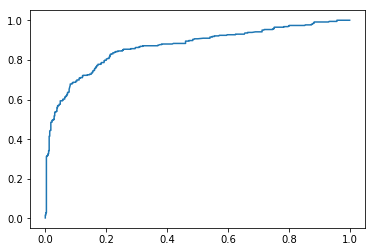

In [91]:
# 알고리즘 선택, 사용하고 싶은 알고리즘을 classifier로 지정하여 사용
# classifier = KNeighborsClassifier()
classifier = LogisticRegression()
# classifier = SVC(probability=True)
# classifier = DecisionTreeClassifier()
# classifier = RandomForestClassifier()
# classifier = GaussianNB()

# 위에서 설정한 classifier의 accuracy 및 AUC, ROC 곡선 확인
classifier.fit(X_train, Y_train)
accuracy = classifier.score(X_train, Y_train) * 100
Y_train_pred = classifier.predict_proba(X_train)[:, 1]

FPR, TPR, thresholds = roc_curve(Y_train, Y_train_pred)
AUC = roc_auc_score(Y_train, Y_train_pred)

plt.plot(FPR, TPR)
print("Accuracy: ", "{0:.2f}".format(accuracy))
print("Area Under the Curve: ", "{0:.2f}".format(AUC))

In [92]:
# test 데이터 예측 결과 출력 및 kaggle 제출파일 생성
predict = classifier.predict(X_test)
predict = np.round(predict)

# kaggle 제출 파일 생성
submission = pd.DataFrame({'PassengerId': preprocessing_test_data['PassengerId'], 'Survived': predict})
submission.to_csv('submission.csv', index=False)